In [30]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

In [4]:
FILE_PATH = "../Dati/Run_Na_trigger512_Data_5_17_2024_Ascii.root" #Relative file path
file1 = uproot.open(FILE_PATH)
FILE_PATH = "../Dati/Run_Na_trigger512_Data_5_16_2024_Ascii.root"
file2 = uproot.open(FILE_PATH)
FILE_PATH="../Dati/Run_Na_trigger512_Data_5_16_2024__0003Ascii.root"
file3 = uproot.open(FILE_PATH)


In [6]:
nch=file1["tree"]["ch"].array()
print(nch)

[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [7]:
baselines = np.concatenate( (file1["tree"]["base"].array(), file2["tree"]["base"].array(), file3["tree"]["base"].array()) , axis=0 ) 
charges = np.concatenate( (file1["tree"]["charge"].array(), file2["tree"]["charge"].array(), file3["tree"]["charge"].array() ), axis=0 )
amp = np.concatenate( (file1["tree"]["amp"].array(), file2["tree"]["amp"].array(), file3["tree"]["amp"].array() ), axis=0 )
lead_edge = np.concatenate( (file1["tree"]["letime"].array(), file2["tree"]["letime"].array(), file3["tree"]["letime"].array()), axis=0 )
t_edge = np.concatenate( (file1["tree"]["tetime"].array(), file2["tree"]["tetime"].array(), file3["tree"]["tetime"].array()), axis=0 )
channel= np.concatenate( (file1["tree"]["ch"].array(), file2["tree"]["ch"].array(), file3["tree"]["ch"].array()), axis=0 )
waveform = np.concatenate( (file1["tree"]["pshape"].array(), file2["tree"]["pshape"].array(), file3["tree"]["pshape"].array() ), axis=0 )

In [8]:
N_ev=len(charges[:, 0])
print(N_ev)

40957


21
1210
100
101
[ 26.  31.  37.  35.  34.  32.  32.  27.  35.  42.  29.  40.  50.  53.
  80.  91. 118. 168. 201. 250. 266. 336. 324. 284. 290. 238. 209. 194.
 143. 134. 121. 122. 128. 102. 101.  79. 100.  87.  66.  76.  62.  77.
  69.  58.  55.  52.  32.  30.  22.  29.  17.  21.  20.  14.  20.  15.
  12.  10.   8.  14.   9.   8.   8.   6.   7.  12.   6.   5.   7.  10.
  10.   5.   6.   9.   9.   6.   8.   2.   6.   5.   2.   1.   7.   8.
   4.   5.   9.   3.   2.   5.   3.   4.   3.   1.   3.   8.   7.   4.
   3.  14.]
[-2000.  -1980.5 -1961.  -1941.5 -1922.  -1902.5 -1883.  -1863.5 -1844.
 -1824.5 -1805.  -1785.5 -1766.  -1746.5 -1727.  -1707.5 -1688.  -1668.5
 -1649.  -1629.5 -1610.  -1590.5 -1571.  -1551.5 -1532.  -1512.5 -1493.
 -1473.5 -1454.  -1434.5 -1415.  -1395.5 -1376.  -1356.5 -1337.  -1317.5
 -1298.  -1278.5 -1259.  -1239.5 -1220.  -1200.5 -1181.  -1161.5 -1142.
 -1122.5 -1103.  -1083.5 -1064.  -1044.5 -1025.  -1005.5  -986.   -966.5
  -947.   -927.5  -908.   -888.5  -869. 

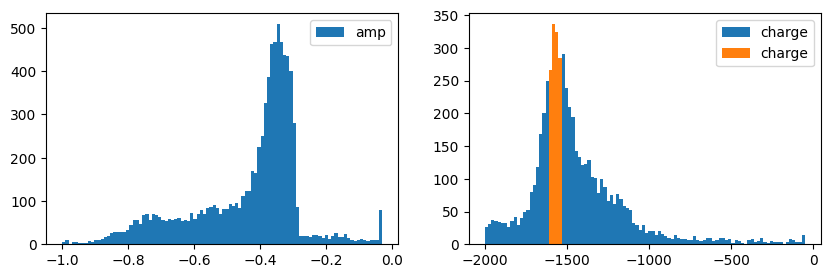

In [9]:
channel=15


plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
a=plt.hist(amp[:, channel-4], bins=100, range=(-1, -0.03), label='amp')
plt.legend()
plt.subplot(1,2,2)
b=plt.hist(charges[:, channel-4], bins=100, range=(-2000, -50), label='charge')


print(np.argmax(b[0]))
idx=np.argmax(b[0])
mask=np.where( (charges[:,channel-4]>b[1][idx-1]) &( charges[:, channel-4]<b[1][idx+3]))[0]
print(len(mask))

b1=plt.hist(charges[:, channel-4][mask], bins=100, range=(-2000, -50), label='charge')
plt.legend()
print(len(b[0]))
print(len(b[1]))

print(b[0])
print(b[1])

print(b[1][idx-1])
print(b[1][idx+3])


In [34]:
limL=np.zeros(16)
limR=np.zeros(16)
for channel in range(4,16):
    try:
        b=np.histogram(charges[:, channel-4], bins=100, range=(-2000, -50))
        idx=np.argmax(b[0])
        limL[channel]=b[1][idx-1]
        limR[channel]=b[1][idx+3]

    except IndexError:
        limL[channel]=b[1][idx]
        limR[channel]=b[1][idx+1]
        continue

print(limL)
print(limR)

canale=[4,5,6,7,8,9,10,11,12,13,14,15]
coppia=np.array([ [4,5], [6,7], [8,9], [10,11], [12,13], [14,15] ])
coppia=np.array([[4,5], [14,15]])
firstch = coppia[:,0]
secondch = coppia[:,1]

map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print(map)

firstch_limits=[ [limL[coppia[i][0]], limR[coppia[i][0]]] for i in range(len(coppia))]
secondch_limits=[[limL[coppia[i][1]], limR[coppia[i][1]]] for i in range(len(coppia))]

print(firstch_limits)
print(secondch_limits)

[    0.      0.      0.      0.   -752.  -1278.5  -869.  -1239.5  -986.
  -557.   -459.5  -771.5  -401.    -69.5 -1142.  -1610. ]
[    0.      0.      0.      0.   -674.  -1200.5  -791.  -1161.5  -908.
  -479.   -381.5  -693.5  -323.    -50.  -1064.  -1532. ]
[-1 -1 -1 -1  0  1 -1 -1 -1 -1 -1 -1 -1 -1  2  3]
[[-752.0, -674.0], [-1142.0, -1064.0]]
[[-1278.5, -1200.5], [-1610.0, -1532.0]]


In [35]:
paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []

paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1, channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])

#import gc
#del waveform
#gc.collect()



In [36]:
print(len(paired_amp_1))

71


In [3]:
x = [95, 102.5]
y = [5, 17]

x_new = 10

y_new = np.interp(x_new, y,x)
print(y_new)
# 13.0

98.125


In [37]:
stds = np.zeros([1, 15])
i = 0
j = 0
for n in [8]:
    for thr in np.linspace(-1, -0.15, 15):
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledges1[evt] = np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            ledges2[evt] = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]

        stds[i][j] = np.std((ledges2 - ledges1)*1.8)
        j += 1
    j = 0
    i += 1

n = 8, 	 thr = -1.0	
n = 8, 	 thr = -0.9392857142857143	
n = 8, 	 thr = -0.8785714285714286	
n = 8, 	 thr = -0.8178571428571428	
n = 8, 	 thr = -0.7571428571428571	
n = 8, 	 thr = -0.6964285714285714	
n = 8, 	 thr = -0.6357142857142857	
n = 8, 	 thr = -0.575	
n = 8, 	 thr = -0.5142857142857142	
n = 8, 	 thr = -0.4535714285714286	
n = 8, 	 thr = -0.3928571428571429	
n = 8, 	 thr = -0.3321428571428572	
n = 8, 	 thr = -0.27142857142857146	
n = 8, 	 thr = -0.21071428571428574	
n = 8, 	 thr = -0.15	


15.93994137730866


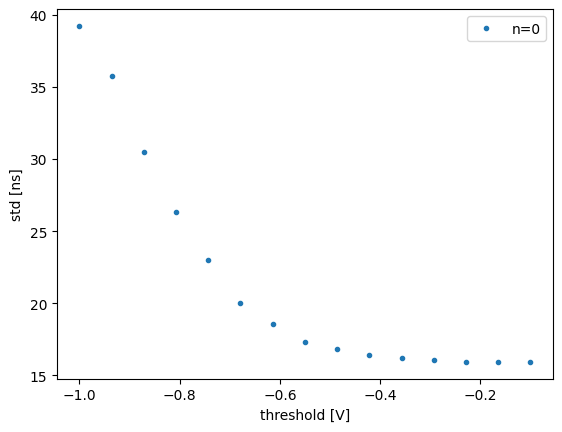

In [16]:
for n in [0]:
    plt.plot(np.linspace(-1, -0.10, 15), stds[n], '.', label = f'{n=}')
plt.legend()
plt.xlabel("threshold [V]")
plt.ylabel("std [ns]")
print(np.min(stds))

n = 5, 	 thr = -0.2	
3.0582637609719043
n = 5, 	 thr = -0.15	
3.140036734479002
n = 8, 	 thr = -0.2	
3.0305117133741555
n = 8, 	 thr = -0.15	
3.122716033931268
n = 10, 	 thr = -0.2	
2.888416521210194
n = 10, 	 thr = -0.15	
3.0749291712433426
n = 15, 	 thr = -0.2	
2.976485973425711
n = 15, 	 thr = -0.15	
2.8751641257500418


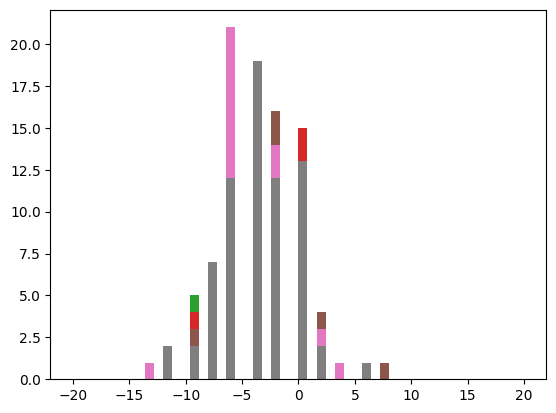

In [38]:
stds = np.zeros([5, 3])
i = 0
j = 0
sampling=1.87
shift=5

for n in [5,8,10,15]:
    for thr in [-0.20, -0.15]:
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledge= np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            ledges1[evt]=np.interp(threshold,  [new_wf_1[evt][ledge-shift], new_wf_1[evt][ledge+shift]], [ledge-shift, ledge+shift])

            ledge = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]
            ledges2[evt]=np.interp(threshold,  [new_wf_2[evt][ledge-shift], new_wf_2[evt][ledge+shift]], [ledge-shift, ledge+shift])

        

        timeres=ledges1-ledges2
        plt.hist(timeres*sampling, bins=50, range=(-20,20))

        mask=np.where(np.abs(timeres*sampling) < 10)[0]

        print(np.std(sampling*timeres[mask]))

        stds[i][j] = np.std(sampling*timeres[mask])
        j += 1
    j = 0
    i += 1


#4.1669487180823195

In [ ]:
paired_letime_1=np.array(paired_letime_1)
paired_letime_2=np.array(paired_letime_2)
plt.hist(paired_letime_1-paired_letime_2, bins=20, range=(-100,100) )
print(np.std(paired_letime_1-paired_letime_2))